# 군집화 - Wine data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
wine = load_wine()
wine_std = StandardScaler().fit_transform(wine.data)

pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_std)

- 군집화

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2022)
kmeans.fit(wine_std)

KMeans(n_clusters=3, random_state=2022)

In [5]:
df = pd.DataFrame({
    'PC1':wine_pca[:,0], 'PC2':wine_pca[:,1],
    'target':wine.target, 'cluster':kmeans.labels_
})
df.head()

,PC1,PC2,target,cluster
0,3.316751,-1.443463,0,2
1,2.209465,0.333393,0,2
2,2.516740,-1.031151,0,2
3,3.757066,-2.756372,0,2
4,1.008908,-0.869831,0,2


In [6]:
kmeans.cluster_centers_

array([[ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529]])

- 데이터 시각화

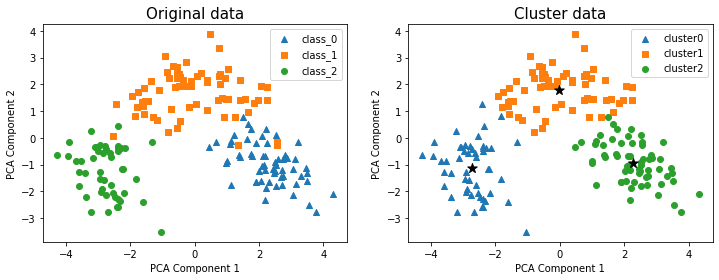

In [11]:
markers = ['^','s','o']
plt.figure(figsize=(12,4))
for k, column in enumerate(['target','cluster']):
    plt.subplot(1, 2, k+1)
    for i, marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        if k == 0:
            plt.title('Original data', fontsize=15)
            plt.scatter(x_data, y_data, marker=marker, label=wine.target_names[i])
        else:
            plt.title('Cluster data', fontsize=15)
            plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))
            plt.scatter(x_data.mean(), y_data.mean(), marker='*', c='black', s=100)

    plt.legend()
    plt.xlabel('PCA Component 1'), plt.ylabel('PCA Component 2')
plt.show()